In [1]:
import pandas as pd
import wave
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io.wavfile import read as read_wav
from scipy.io import wavfile
import noisereduce as nr


In [2]:
other = pd.read_csv('data_frames/ecoGuns_SST_Guns_Training-OtherSounds.csv')
ecoguns = pd.read_csv('data_frames/Guns_Training_ecoGuns_SST.csv')
pnn = pd.read_csv('data_frames/nn_Grid50_guns_dep1-7_Guns_Training.csv')

# Deleting some extra columns that were included in dfs
pnn = pnn.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0'])
ecoguns = ecoguns.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0'])
other = other.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0'])

# update Dfs
other.to_csv('data_frames/ecoGuns_SST_Guns_Training-OtherSounds.csv', index=False)
ecoguns.to_csv('data_frames/Guns_Training_ecoGuns_SST.csv', index= False)
pnn.to_csv('data_frames/nn_Grid50_guns_dep1-7_Guns_Training.csv', index=False)
other

KeyError: "['Unnamed: 0.2', 'Unnamed: 0'] not found in axis"

## Average frequency range of a gunshot

In [3]:
def plot_freq_spectrum (origen_file, destination_file):
    wave_object = wave.open(origen_file, 'rb')
    channel = wave_object.getnchannels()
    n_samples = wave_object.getnframes()
    sample_freq = wave_object.getframerate()
    t_audio = n_samples/sample_freq
    signal_wave = wave_object.readframes(n_samples)
    if channel !=1:
        raise Exception ('Some sample have more than one channel')
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    plt.figure(figsize=(19, 5))
    plt.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
    #plt.specgram(signal_array, Fs=sample_freq, vmin=-70, vmax=0)
    plt.title('Spectogram')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.xlim(0, t_audio)
    plt.colorbar()
    #plt.savefig(destination_file)
    plt.show()

def plot_time (origen_file, destination_file):
    wave_object = wave.open(origen_file, 'rb')
    channel = wave_object.getnchannels()
    n_samples = wave_object.getnframes()
    sample_freq = wave_object.getframerate()
    t_audio = n_samples/sample_freq
    signal_wave = wave_object.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)

    if channel !=1:
        raise Exception ('Some sample have more than one channel')
    times = np.linspace(0, t_audio, num = n_samples)
    plt.figure(figsize=(15, 5))
    plt.plot(times, signal_array)
    plt.title('Audio Wave')
    plt.ylabel('Signal Value')
    plt.xlabel('Time (s)')
    plt.xlim(0, t_audio)
    plt.grid()
    plt.savefig(destination_file)
    plt.show()

# Denoising

In [6]:
def denoise_spectal_gating(file_name, destination, stat):
    rate, data = wavfile.read(file_name)
    # perform noise reduction
    reduced_noise = nr.reduce_noise(y=data, sr=rate, stationary=stat)
    wavfile.write('data/Images/denoised/' + destination, rate, reduced_noise)


## Noise reduction with Spectral Gating for all clips

In [ ]:
for i in range(0,20):
    #ECOGUNS : stationary = TRUE
    file_name = ecoguns.iloc[i]['Clip Location']
    denoise_spectal_gating(file_name, f'gunshots/ecoguns{i}.wav', True)
    #PNN
    file_name = pnn.iloc[i]['Clip Location']
    denoise_spectal_gating(file_name, f'gunshots/pnn{i}.wav', True)

In [ ]:
for i in range(0,20):
    #OTHER
    file_name = other.iloc[i]['Clip Location']
    denoise_spectal_gating(file_name, f'no_gunshots/other{i}.wav', True)

In [ ]:
#Saving the plots
for i in range(0,20):
    # ECOGUNS
    file_name = f'data/Images/denoised/gunshots/ecoguns{i}.wav'
    destination1 = f'data/Images/denoised/images/ecoguns_freq{i}.png'
    destination2 = f'data/Images/denoised/images/ecoguns_time{i}.png'
    plot_freq_spectrum(file_name, destination1)
    plot_time(file_name, destination2)
    # PNN
    file_name = f'data/Images/denoised/gunshots/pnn{i}.wav'
    destination1 = f'data/Images/denoised/images/pnn_freq{i}.png'
    destination2 = f'data/Images/denoised/images/pnn_time{i}.png'
    plot_freq_spectrum(file_name, destination1)
    plot_time(file_name, destination2)
    # OTHER
    file_name = f'data/Images/denoised/no_gunshots/other{i}.wav'
    destination1 = f'data/Images/denoised/images/other_freq{i}.png'
    destination2 = f'data/Images/denoised/images/other_time{i}.png'
    plot_freq_spectrum(file_name, destination1)
    plot_time(file_name, destination2)

#OTHER


#file_name = ecoguns.iloc[4]['Clip Location']
#file_name2 = 'data/Images/denoised/2.wav'
#file_name3 = 'data/Images/denoised/3.wav'

#plot_time(file_name) #original plot




### 1. FFT

- For us to see the magnitude each frequency is contributing to the overall sound of the audio file, we need to implement a Fast-Fourier Transformation algorithm (this can compute a DFT)
- FFT takes the audio from time domain into freq domain
- The magnitude of each freq present in the audio is plotted

In [4]:
# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(signal)
# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)
# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sr, len(magnitude))
# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)]
plt.plot(left_freq, left_mag)
plt.title('Discrete-Fourier Transform: Amplitud spectrum plot', fontdict=dict(size=15))
plt.xlabel('Frequency', fontdict=dict(size=12))
plt.ylabel('Magnitude: contribution of each frequency', fontdict=dict(size=12))
plt.show()

NameError: name 'signal' is not defined

### 2. Time frequency representation
How the frequency content changes over time

Text(174.34722222222223, 0.5, 'Amplitude')

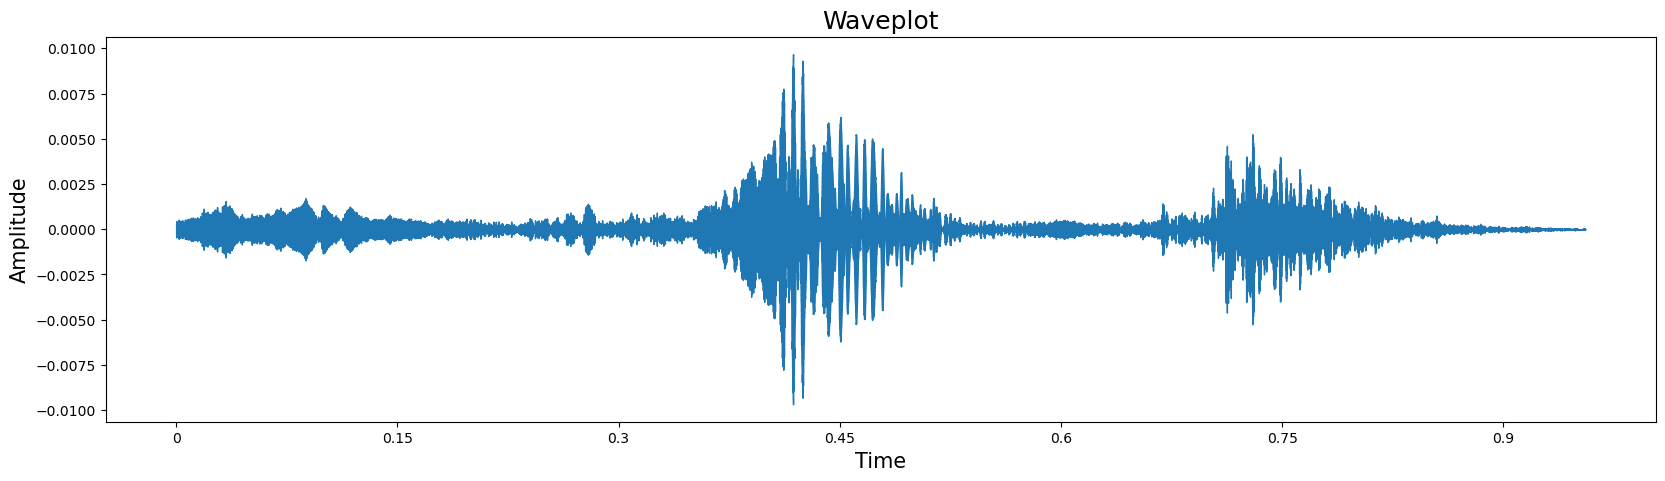

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#signal, sr = librosa.load(ecoguns.iloc[4]['Clip Location'])
signal, sr = librosa.load('data/Clips_denoised/gunshots/spectral_gating/ecoguns0.wav') #denoised

plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))

- Magnitudes tell us the level of contribution for each frequency in the sound. The larger the magnitude, the greater the contribution that frequency gave to the overall sound in the audio.
- There is no time associated to this spectogram so to see it we should make a spectogram.

### Short time Fourier Transformation Algorithm

- To create a spectrogram, we perform a FFT in small segments or frames --> Short Time Fourier Transformation (STFT)
- This allows to preserve information about the time and how audio signal evolves.

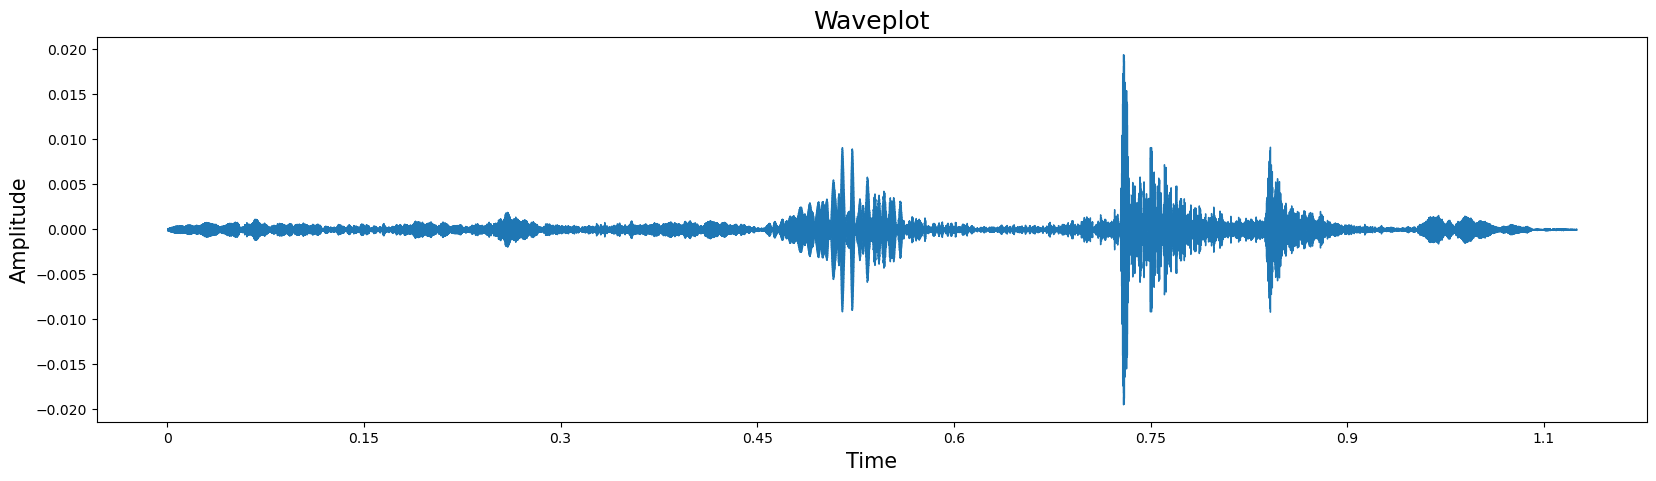

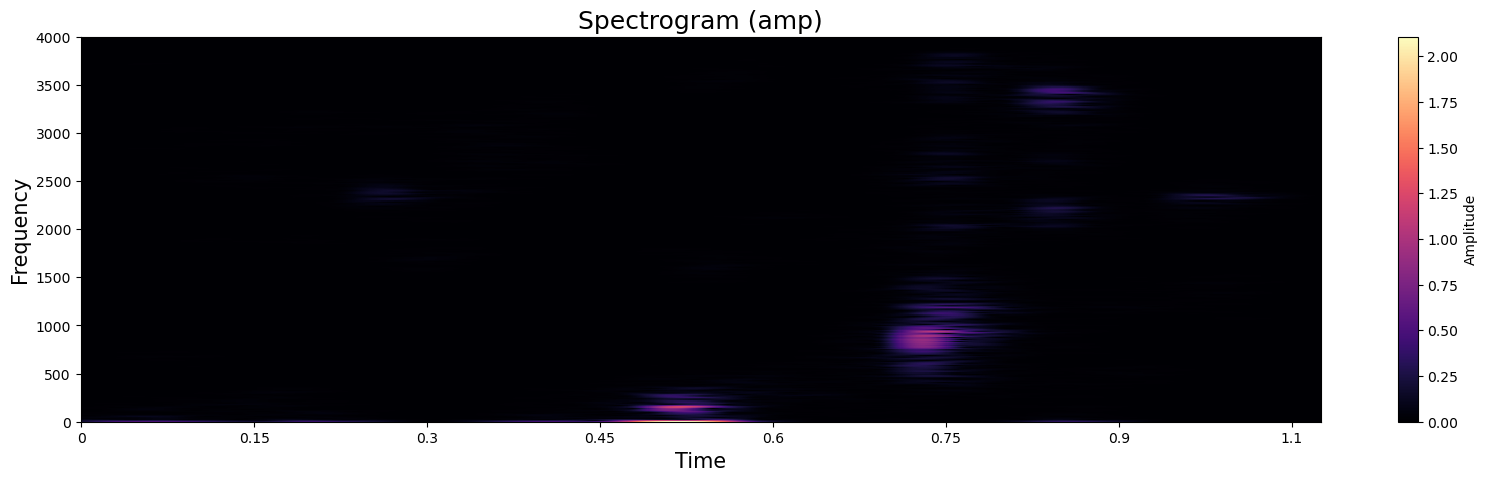

AttributeError: module 'matplotlib' has no attribute 'pyplot'

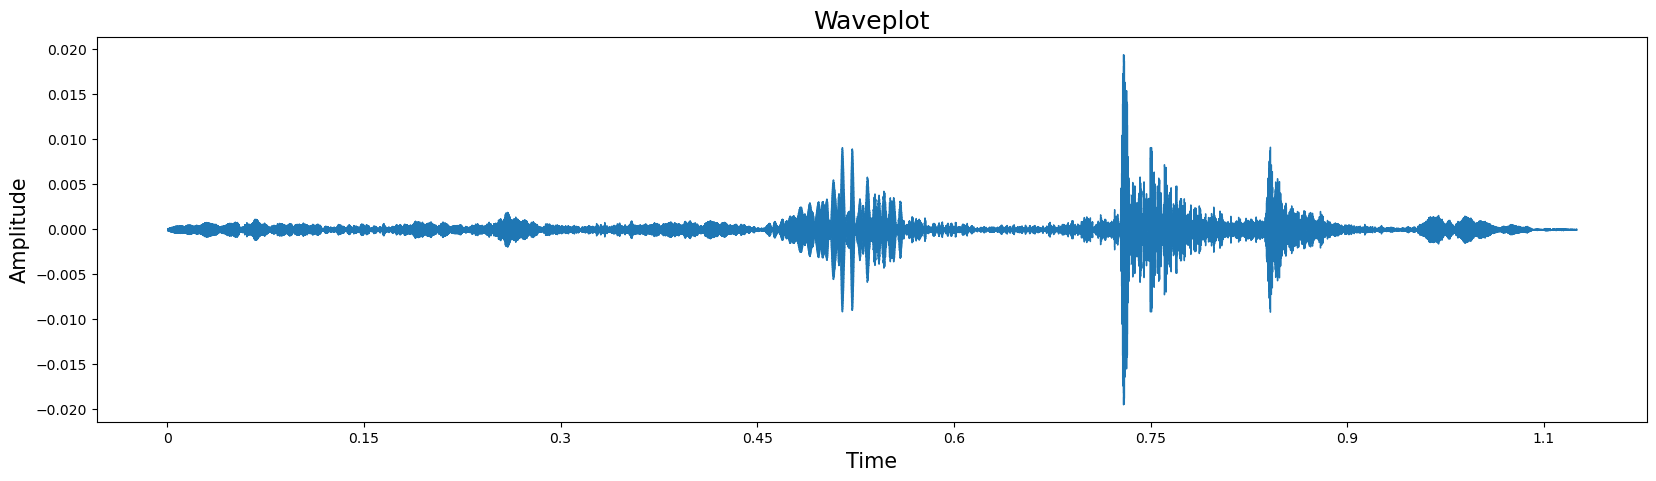

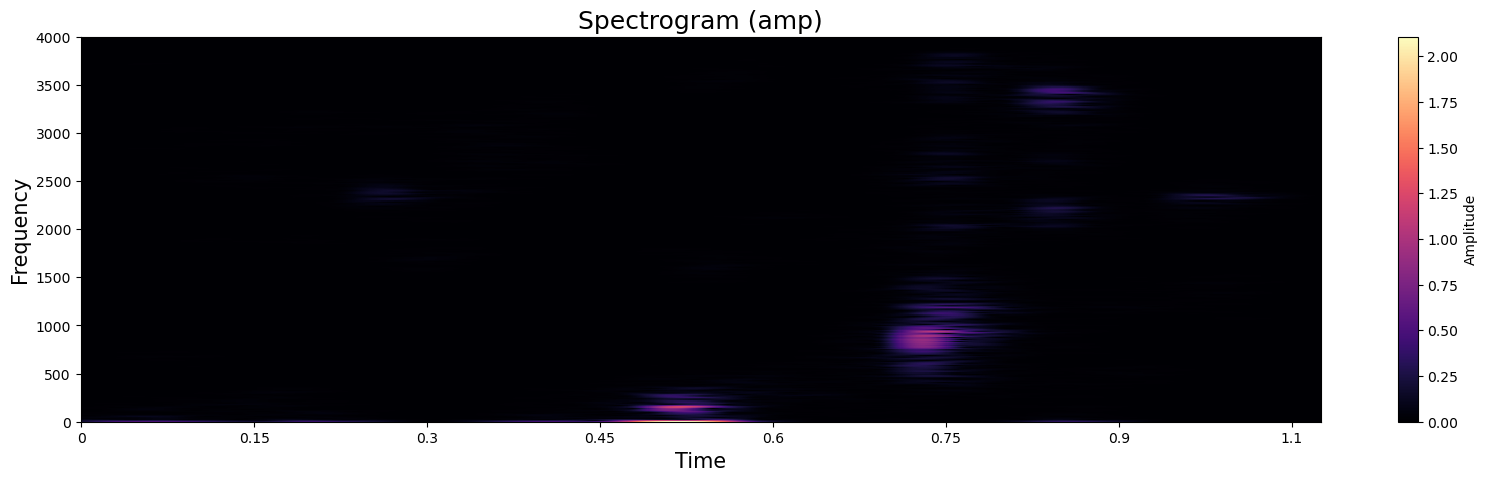

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [12]:
# this is the number of samples in a window per fft
n_fft = 2048 #TODO: no idea about this value
# The amount of samples we are shifting after each fft
hop_length = 20 #How far the frame slides is determined by the hop length, which tells the function how many sample rates to the right it should slide when we create the next frame. #TODO: no idea about this value

# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)
# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))
# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='hz', hop_length=hop_length)
plt.colorbar(label='Amplitude')
plt.title('Spectrogram (amp)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
ax = plt.gca()
ax.set_ylim([0, 4000])

### Convert spectogram from amplitude to decibels

- This allows to visualize loudness

In [ ]:
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)
# Converting the amplitude to decibels
log_spectro = librosa.amplitude_to_db(spectrogram)
# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))
# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(log_spectro, sr=sr, x_axis='time', y_axis='hz', hop_length=hop_length, cmap='magma')
plt.colorbar(label='Decibels')
plt.title('Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
ax = plt.gca()
ax.set_ylim([0, 4000])
plt.show()

### Mel spectogram

- Mel-spectrogram converts the frequencies to the mel-scale.
- the mel-scale is “a perceptual scale of pitches judged by listeners to be equal in distance from one another”
- The idea of this transformation is that sounds of equal distance on the Mel Scale are perceived to be of equal distance to humans. What does this mean?
- For example, most human beings can easily tell the difference between a 100 Hz and 200 Hz sound. However, by that same token, we should assume that we can tell the difference between 1000 and 1100 Hz, right? Wrong.
It is actually much harder for humans to be able to differentiate between higher frequencies, and easier for lower frequencies. So, even though the distance between the two sets of sounds are the same, our perception of the distance is not. This is what makes the Mel Scale fundamental in Machine Learning applications to audio, as it mimics our own perception of sound.
- https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8

In [ ]:
mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length,
                                            n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(20, 5))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma', hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
ax = plt.gca()
ax.set_ylim([0, 4096])
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(signal, sr=sr)
plt.title(‘Waveplot’, fontdict=dict(size=18))
plt.xlabel(‘Time’, fontdict=dict(size=15))
plt.ylabel(‘Amplitude’, fontdict=dict(size=15))
plt.show()